# Road Accident Analysis

## Points to analyze:
1. Yearwise accidents number.
2. Weather conditions during accident.
3. Lighting conditions during accident.
4. Types of trafficway in which accidents happens.
5. Type of surface conditions during accidents.
6. Types of road defect due to which accidents happens.
7. Mistakes due to which accidents happened.
8. Total injury's happened due to accidents.
9. Total number of deaths due to accidents.
10. Major time range in which most of the accidents happened.
11. Major days in which most of the accidents happened.
12. Major months in which most of the accidents happened.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('traffic_accidents.csv')

### Data cleaning 

In [4]:
df.duplicated().sum()

31

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.head(3)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12


In [7]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209275 non-null  object 
 1   traffic_control_device         209275 non-null  object 
 2   weather_condition              209275 non-null  object 
 3   lighting_condition             209275 non-null  object 
 4   first_crash_type               209275 non-null  object 
 5   trafficway_type                209275 non-null  object 
 6   alignment                      209275 non-null  object 
 7   roadway_surface_cond           209275 non-null  object 
 8   road_defect                    209275 non-null  object 
 9   crash_type                     209275 non-null  object 
 10  intersection_related_i         209275 non-null  object 
 11  damage                         209275 non-null  object 
 12  prim_contributory_cause        2092

In [9]:
df['crash_date']=pd.to_datetime(df['crash_date'])

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\2045040363.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date']=pd.to_datetime(df['crash_date'])


In [10]:
df.drop(columns=['most_severe_injury','injuries_reported_not_evident','injuries_no_indication','num_units','damage','crash_type','alignment','traffic_control_device'],inplace=True)

In [11]:
df['crash_year']= df['crash_date'].dt.year

### Data Analysis 

#### Yearwise accidents number.

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\3084770101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df,x='crash_year', palette='viridis')


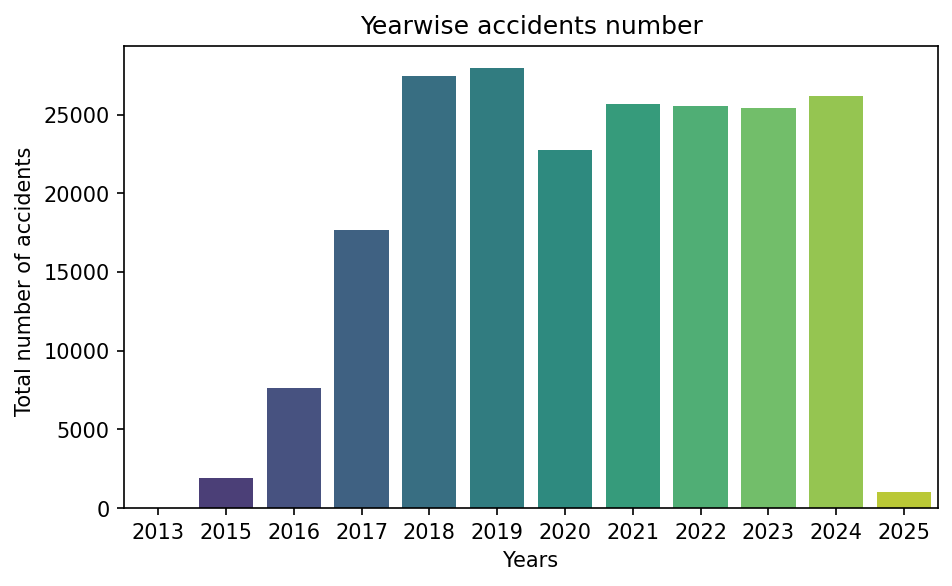

In [104]:
plt.figure(dpi=150,figsize=(7,4))
sns.countplot(data= df,x='crash_year', palette='viridis')
plt.title('Yearwise accidents number')
plt.xlabel('Years')
plt.ylabel('Total number of accidents ')
plt.savefig('crash_frequency_by_year.png', dpi=300)
plt.show()

#### Major months in which most of the accidents happened.

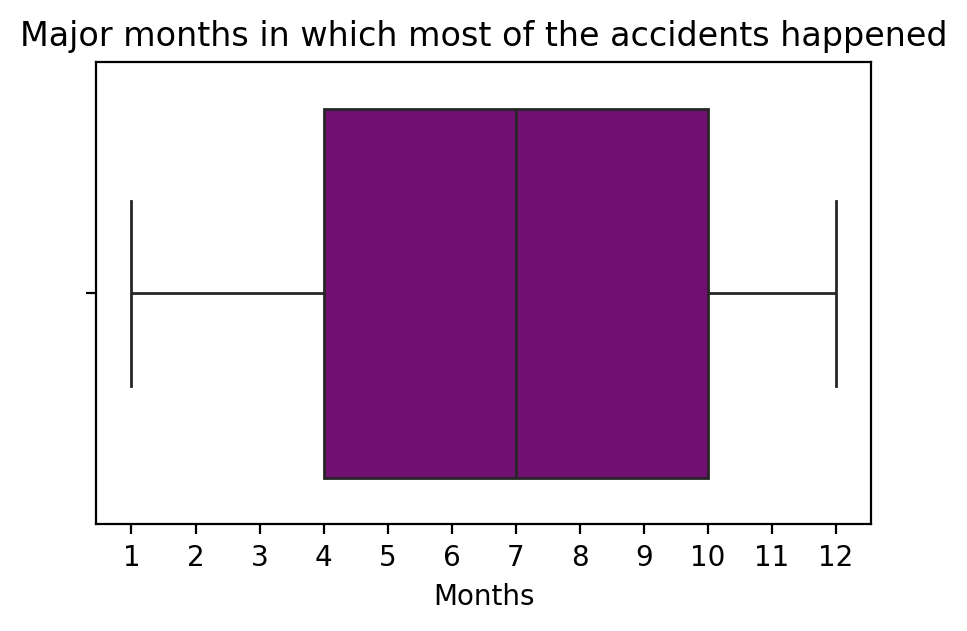

In [107]:
plt.figure(dpi=200,figsize=(5,3))
hr=sns.boxplot(data= df,x='crash_month',color='purple')
hr.set_xticks(range(1,13))
plt.title('Major months in which most of the accidents happened')
plt.xlabel('Months')
plt.savefig('crash_frequency_by_month.png', dpi=300)
plt.show()

#### Major days in which most of the accidents happened.

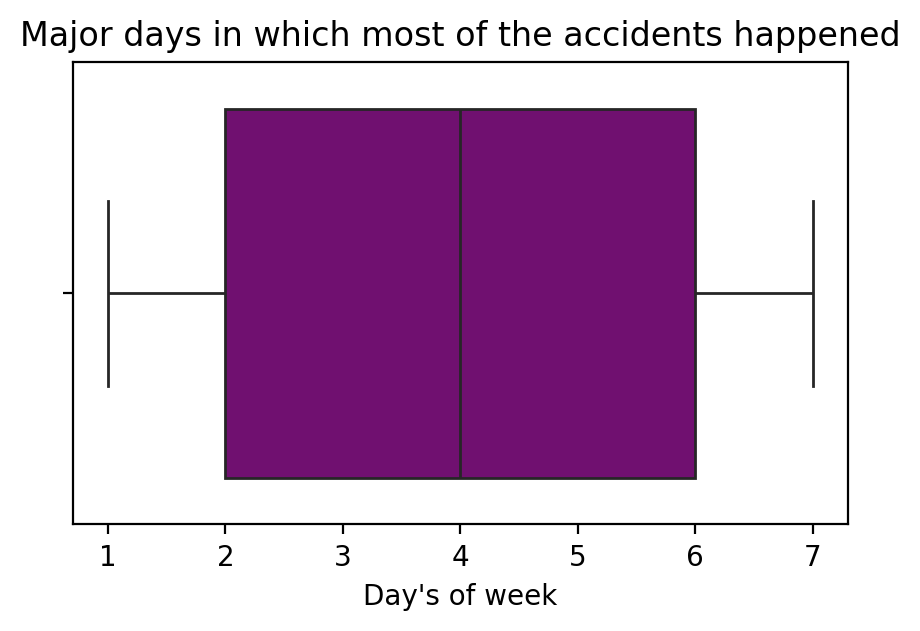

In [110]:
plt.figure(dpi=200,figsize=(5,3))
w=sns.boxplot(data= df,x='crash_day_of_week',color='purple')
w.set_xticks(range(1,8))
plt.title('Major days in which most of the accidents happened')
plt.xlabel("Day's of week")
plt.show()

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\2926909973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='crash_hour', data=df, palette='coolwarm', order=range(24))


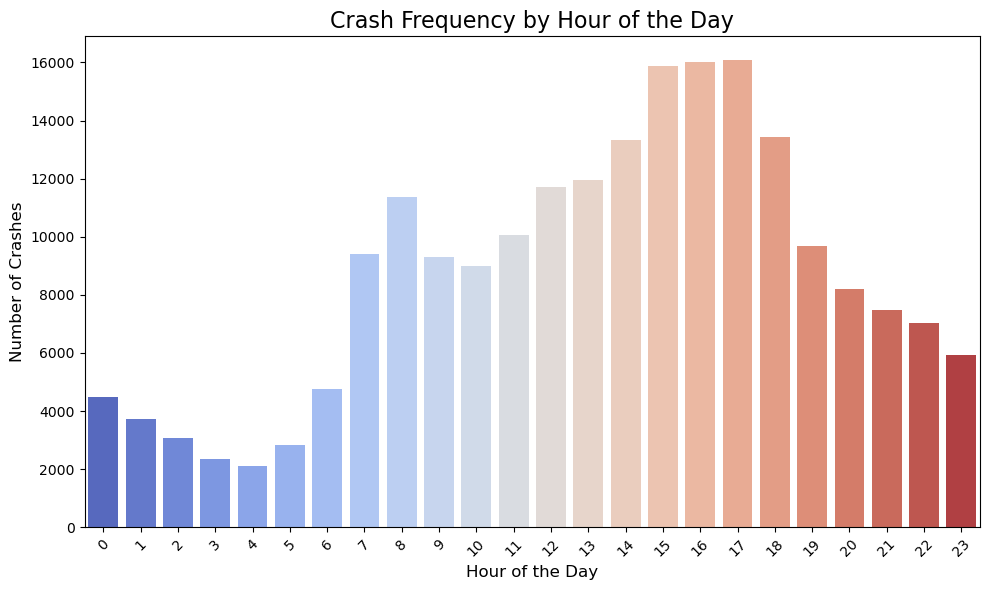

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='crash_hour', data=df, palette='coolwarm', order=range(24))
plt.title('Crash Frequency by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(range(24), rotation=45)
plt.tight_layout()
plt.savefig('crash_frequency_by_hour.png', dpi=300)
plt.show()

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\4211542617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='crash_month', data=df, palette='viridis', order=range(1, 13))


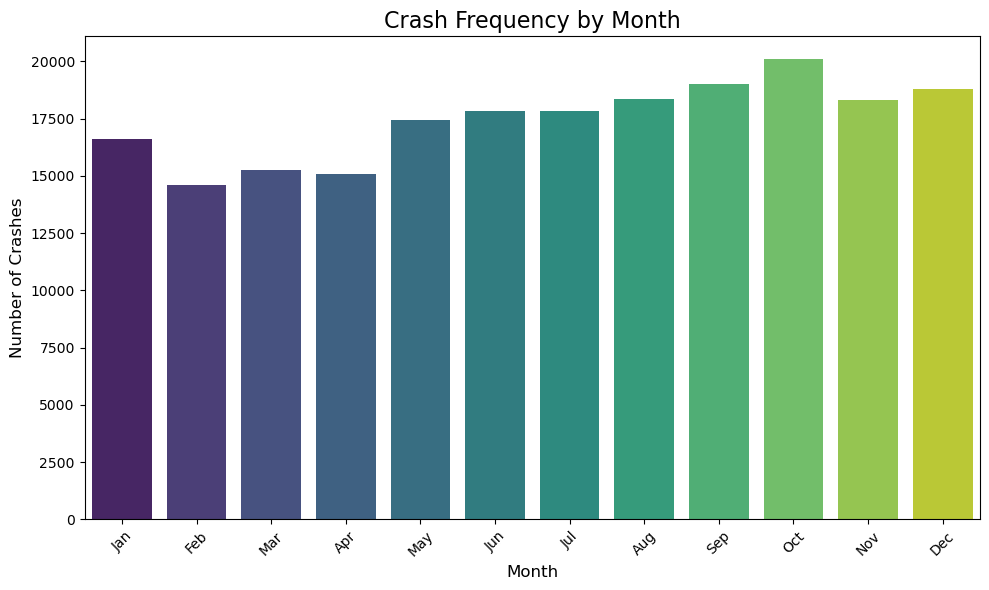

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='crash_month', data=df, palette='viridis', order=range(1, 13))
plt.title('Crash Frequency by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(range(12), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           rotation=45)
plt.tight_layout()
plt.savefig('crash_frequency_by_months.png', dpi=300)
plt.show()

#### Major time range in which most of the accidents happened.

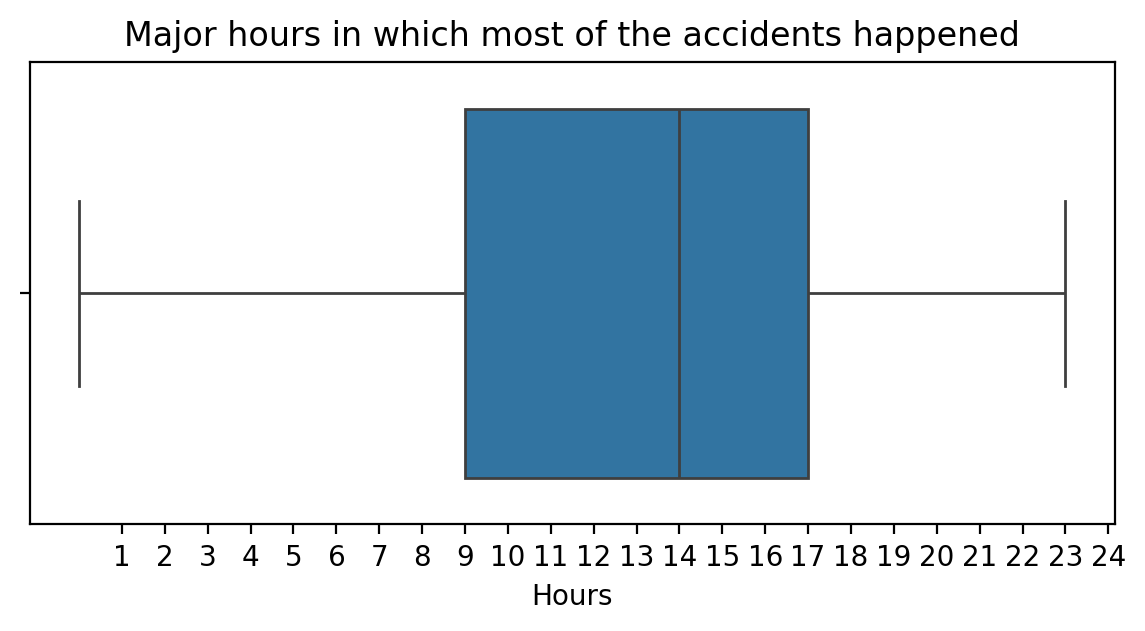

In [113]:
plt.figure(dpi=200,figsize=(7,3))
hr=sns.boxplot(data= df,x='crash_hour')
hr.set_xticks(range(1,25))
plt.title('Major hours in which most of the accidents happened')
plt.xlabel('Hours')
plt.show()

#### Monthwise number of injuries

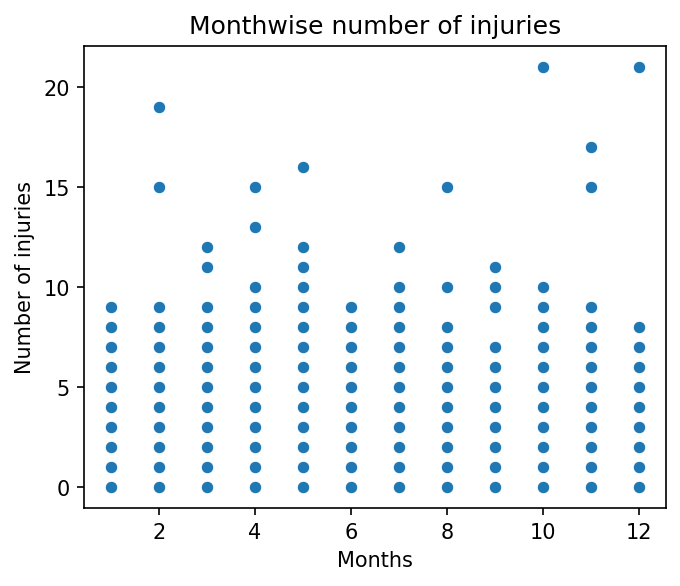

In [116]:
plt.figure(dpi=150,figsize=(5,4))
sns.scatterplot(data=df,x='crash_month',y='injuries_total')
plt.title('Monthwise number of injuries')
plt.xlabel('Months')
plt.ylabel('Number of injuries')
plt.show()

#### Weather conditions during accident.

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\3877602461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather, palette='viridis')


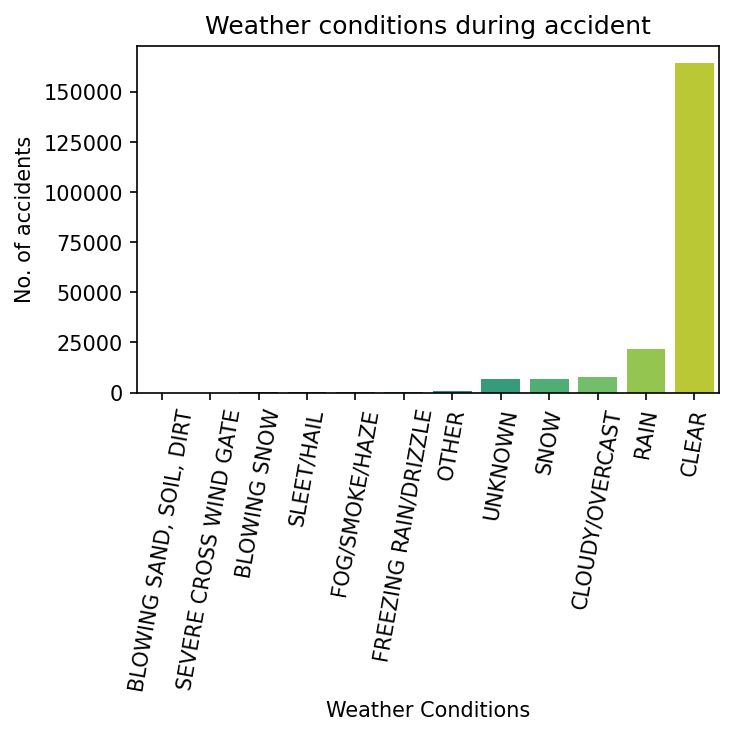

In [119]:
weather=df.groupby('weather_condition')['crash_date'].count().sort_values()
plt.figure(dpi=150,figsize=(5,3))
sns.barplot(data=weather, palette='viridis')
plt.xticks(rotation=80)
plt.title('Weather conditions during accident')
plt.xlabel('Weather Conditions')
plt.ylabel('No. of accidents')
plt.savefig('weather_condition.png', dpi=300)
plt.show()

#### Lighting conditions during accident.

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\4113865896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=light, palette='viridis')


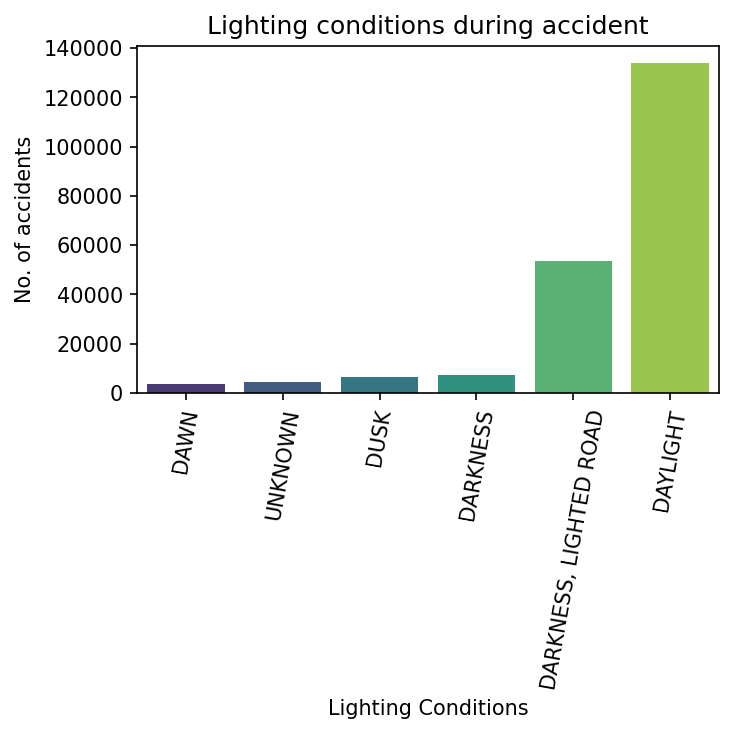

In [122]:
light=df.groupby('lighting_condition')['crash_date'].count().sort_values()
plt.figure(dpi=150,figsize=(5,3))
sns.barplot(data=light, palette='viridis')
plt.xticks(rotation=80)
plt.title('Lighting conditions during accident')
plt.xlabel('Lighting Conditions')
plt.ylabel('No. of accidents')
plt.show()

#### Types of trafficway in which accidents happens.

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\583368926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trafficway, palette='viridis')


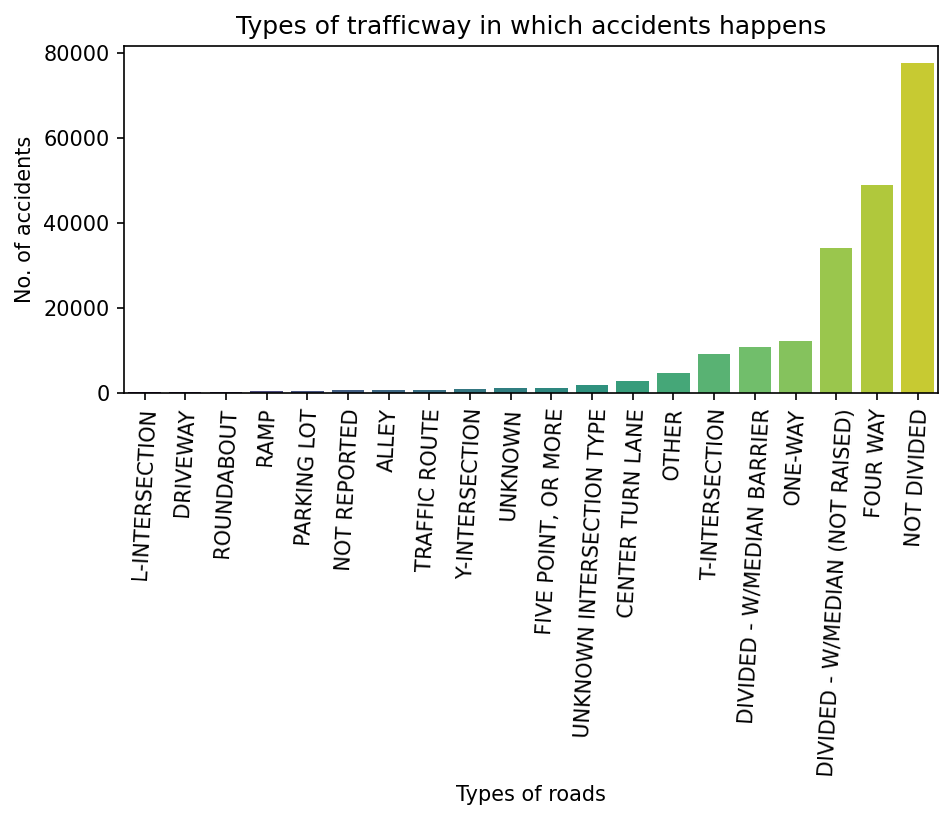

In [125]:
trafficway=df.groupby('trafficway_type')['crash_date'].count().sort_values()
plt.figure(dpi=150,figsize=(7,3))
sns.barplot(data=trafficway, palette='viridis')
plt.xticks(rotation=87)
plt.title('Types of trafficway in which accidents happens')
plt.xlabel('Types of roads')
plt.ylabel('No. of accidents')
plt.show()

#### Type of surface conditions during accidents.

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\4224520613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=surface, palette='viridis')


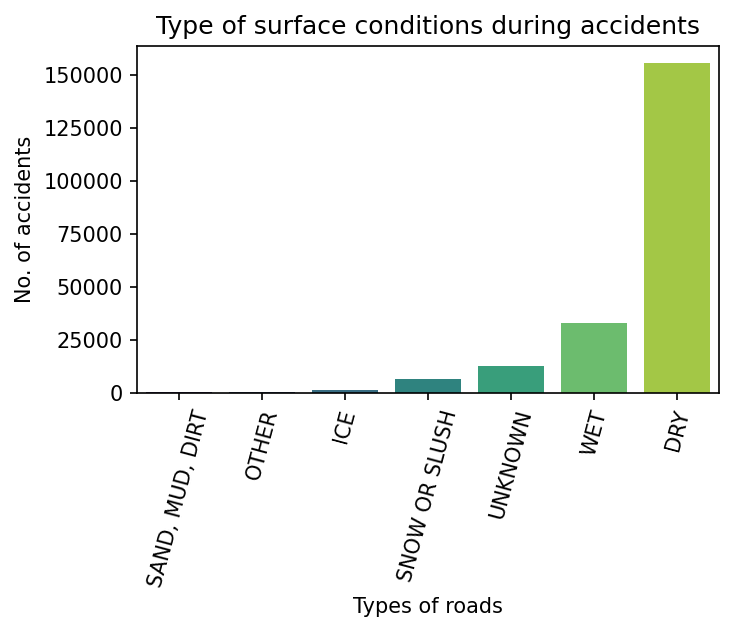

In [128]:
surface=df.groupby('roadway_surface_cond')['crash_date'].count().sort_values()
plt.figure(dpi=150,figsize=(5,3))
sns.barplot(data=surface, palette='viridis')
plt.xticks(rotation=75)
plt.title('Type of surface conditions during accidents')
plt.xlabel('Types of roads')
plt.ylabel('No. of accidents')
plt.show()

#### Types of road defect due to which accidents happens.

C:\Users\welcome\AppData\Local\Temp\ipykernel_19108\4294913456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=defect, palette='viridis')


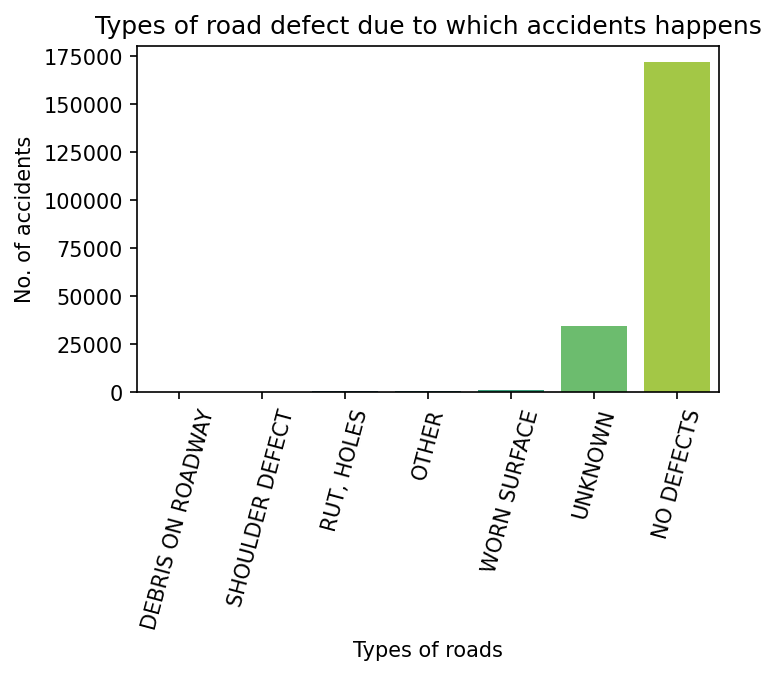

In [131]:
defect=df.groupby('road_defect')['crash_date'].count().sort_values()
plt.figure(dpi=150,figsize=(5,3))
sns.barplot(data=defect, palette='viridis')
plt.xticks(rotation=75)
plt.title('Types of road defect due to which accidents happens')
plt.xlabel('Types of roads')
plt.ylabel('No. of accidents')
plt.show()

#### Mistakes due to which accidents happened.

In [93]:
df.groupby('prim_contributory_cause')['crash_date'].count().sort_values(ascending=False)

prim_contributory_cause
UNABLE TO DETERMINE                                                                 58310
FAILING TO YIELD RIGHT-OF-WAY                                                       42909
FOLLOWING TOO CLOSELY                                                               19074
DISREGARDING TRAFFIC SIGNALS                                                        14590
IMPROPER TURNING/NO SIGNAL                                                          12642
FAILING TO REDUCE SPEED TO AVOID CRASH                                              10675
IMPROPER OVERTAKING/PASSING                                                          8302
DISREGARDING STOP SIGN                                                               6746
IMPROPER LANE USAGE                                                                  6460
NOT APPLICABLE                                                                       5241
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                         

#### total number of injuries due to accident 

In [95]:
df['injuries_total'].sum()

80091.0

#### total number of deaths due to accident 

In [98]:
df['injuries_fatal'].sum()

389.0

#### total number of serious injuries due to accident 

In [101]:
df['injuries_non_incapacitating'].sum()

46297.0

### Conclusion

Road safety isn’t just about building better roads; it’s about understanding when and why accidents occur. 
This analysis sheds light on actionable insights that can guide policymakers, engineers, and drivers alike.
Let’s use this data to pave the way for safer roads and fewer crashes.

#### Thank You 
                                                                                             By - Harsh Agarwal
                                                              [Linkedin](http://www.linkedin.com/in/harshaga819)